# Analyse data

# Individual Quizes

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats

%matplotlib inline

In [3]:
sns.set(style="white", color_codes=True)
sns.set(style="whitegrid")

### Read data

In [4]:
q1 = np.load('scores/Pre_Quiz_Scores.npy', allow_pickle=True).item()
q2 = np.load('scores/Final_Quiz_Scores.npy', allow_pickle=True).item()
q3 = np.load('scores/Map_Scores.npy', allow_pickle=True).item()

In [5]:
students = list(q1.keys())
data = {"student": list(q1.keys()), 
        "pre_quiz": [q1[x][0] for x in students],
        "pre_quiz_norm": [q1[x][1]*100 for x in students],
        "post_quiz": [q2[x][0] for x in students],
        "post_quiz_norm": [q2[x][1]*100 for x in students],
        "map_quiz": [q3[x][0] for x in students],
        "map_quiz_norm": [q3[x][1]*100 for x in students],
        "student_anon": [f"student #{i+1}" for i in range(len(students))]}
df_students = pd.DataFrame(data)

In [6]:
# map students to their nationality
nationality_mapping = {"oriane_peter": "swiss",
                      "antoine_clivaz": "swiss",
                      "thanuditha_wickramasinghe": "sri lankan",
                      "graziano_rossini": "swiss",
                      "alfonso_fernandez": "spanish",
                      "marcel_moya": "spanish",
                      "lukas_deloose": "belgian",
                      "anel_muhamedagic": "german",
                      "alexandre_thimonier": "greek",
                      "guido_sergi": "italian",
                      "kim_haeeun": "korean",
                      "giacomo_alliata": "italian",
                      "ambroise_renaud": "french",
                      "arnaud_garin": "swiss",
                      "kiarash_farivar": "iranian",
                      "kevin": "korean",
                      "louis": "french",
                      "anna_andersson": "swedish",
                      "natalia_gullon": "spanish",
                      "max_schnaubelt": "german"}
df_students["nationality"] = df_students.apply(lambda x: nationality_mapping[x.student], axis=1)
#df_students['student'][7] = "sofia_kypraiou"

In [7]:
# map students to their team
team_mapping = {"oriane_peter": "same1",
                      "antoine_clivaz": "same1",
                      "thanuditha_wickramasinghe": "mixed3",
                      "graziano_rossini": "mixed4",
                      "alfonso_fernandez": "same3",
                      "marcel_moya": "same3",
                      "lukas_deloose": "mixed3",
                      "anel_muhamedagic": "same5",
                      "alexandre_thimonier": "mixed5",
                      "guido_sergi": "same4",
                      "kim_haeeun": "mixed4",
                      "giacomo_alliata": "same4",
                      "ambroise_renaud": "mixed1",
                      "arnaud_garin": "mixed3",
                      "kiarash_farivar": "mixed1",
                      "kevin": "mixed2",
                      "louis": "mixed2",
                      "anna_andersson": "mixed5",
                      "natalia_gullon": "same3",
                      "max_schnaubelt": "same5"}
df_students["team_name"] = df_students.apply(lambda x: team_mapping[x.student], axis=1)
df_students["team_type"] = df_students.apply(lambda x: "SAME" if x.team_name.startswith("same") else "MIXED", axis=1)
#df_students['student'][7] = "sofia_kypraiou"

In [8]:
print(df_students.shape)
df_students

(20, 11)


,student,pre_quiz,pre_quiz_norm,post_quiz,post_quiz_norm,map_quiz,map_quiz_norm,student_anon,nationality,team_name,team_type
0,oriane_peter,0,0.000000,6,100.000000,2,66.666667,student #1,swiss,same1,SAME
1,thanuditha_wickramasinghe,2,33.333333,5,83.333333,0,0.000000,student #2,sri lankan,mixed3,MIXED
2,graziano_rossini,2,33.333333,4,66.666667,2,66.666667,student #3,swiss,mixed4,MIXED
3,alfonso_fernandez,1,16.666667,4,66.666667,2,66.666667,student #4,spanish,same3,SAME
4,marcel_moya,1,16.666667,5,83.333333,2,66.666667,student #5,spanish,same3,SAME
5,lukas_deloose,0,0.000000,5,83.333333,2,66.666667,student #6,belgian,mixed3,MIXED
6,anel_muhamedagic,1,16.666667,5,83.333333,3,100.000000,student #7,german,same5,SAME
7,alexandre_thimonier,2,33.333333,4,66.666667,2,66.666667,student #8,greek,mixed5,MIXED
8,guido_sergi,1,16.666667,5,83.333333,1,33.333333,student #9,italian,same4,SAME
9,kim_haeeun,2,33.333333,5,83.333333,2,66.666667,student #10,korean,mixed4,MIXED


### Individual Stats

In [9]:
df_students.describe()

,pre_quiz,pre_quiz_norm,post_quiz,post_quiz_norm,map_quiz,map_quiz_norm
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.450000,24.166667,4.700000,78.333333,1.950000,65.000000
std,0.887041,14.784020,0.978721,16.312016,0.944513,31.483775
min,0.000000,0.000000,2.000000,33.333333,0.000000,0.000000
25%,1.000000,16.666667,4.000000,66.666667,1.750000,58.333333
50%,1.500000,25.000000,5.000000,83.333333,2.000000,66.666667
75%,2.000000,33.333333,5.000000,83.333333,3.000000,100.000000
max,3.000000,50.000000,6.000000,100.000000,3.000000,100.000000


### What is the distribution of nationalities?

[Text(0, 0, 'swiss'),
 Text(0, 0, 'spanish'),
 Text(0, 0, 'italian'),
 Text(0, 0, 'french'),
 Text(0, 0, 'german'),
 Text(0, 0, 'korean'),
 Text(0, 0, 'belgian'),
 Text(0, 0, 'greek'),
 Text(0, 0, 'sri lankan'),
 Text(0, 0, 'iranian'),
 Text(0, 0, 'swedish')]

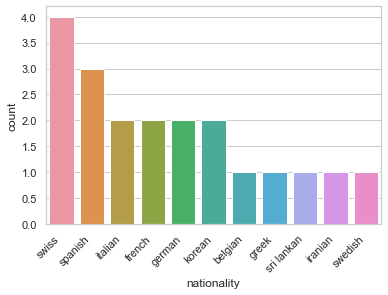

In [10]:
chart = sns.countplot(x="nationality", data=df_students, order=df_students['nationality'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

### On which type of questions did students perform better: DGSM or SGDM?

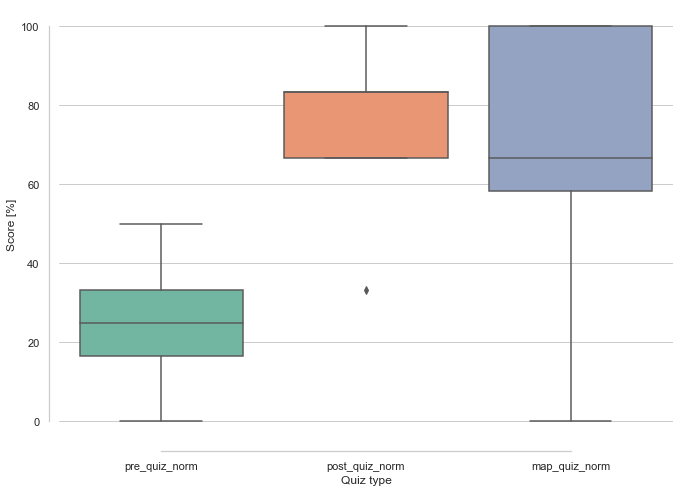

In [11]:
sns.set_context({"figure.figsize": (11,8)})
sns.boxplot(data=df_students[["pre_quiz_norm", "post_quiz_norm", "map_quiz_norm"]], orient="w", palette="Set2")
sns.despine(offset=10, trim=True)

plt.ylabel("Score [%]")
plt.xlabel("Quiz type");

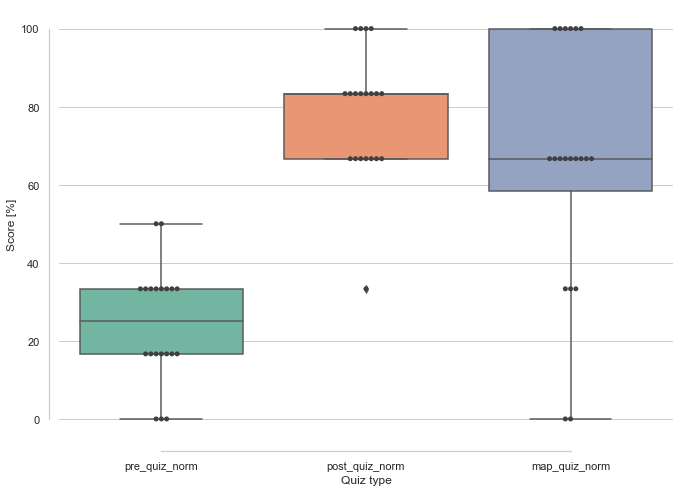

In [12]:
sns.boxplot(data=df_students[["pre_quiz_norm", "post_quiz_norm", "map_quiz_norm"]], orient="w", palette="Set2")
sns.despine(offset=10, trim=True)
sns.swarmplot(data=df_students[["pre_quiz_norm", "post_quiz_norm", "map_quiz_norm"]], color=".25")

plt.ylabel("Score [%]")
plt.xlabel("Quiz type");

### What is density distribution for the Pre-Quiz vs. Post-Quiz results?

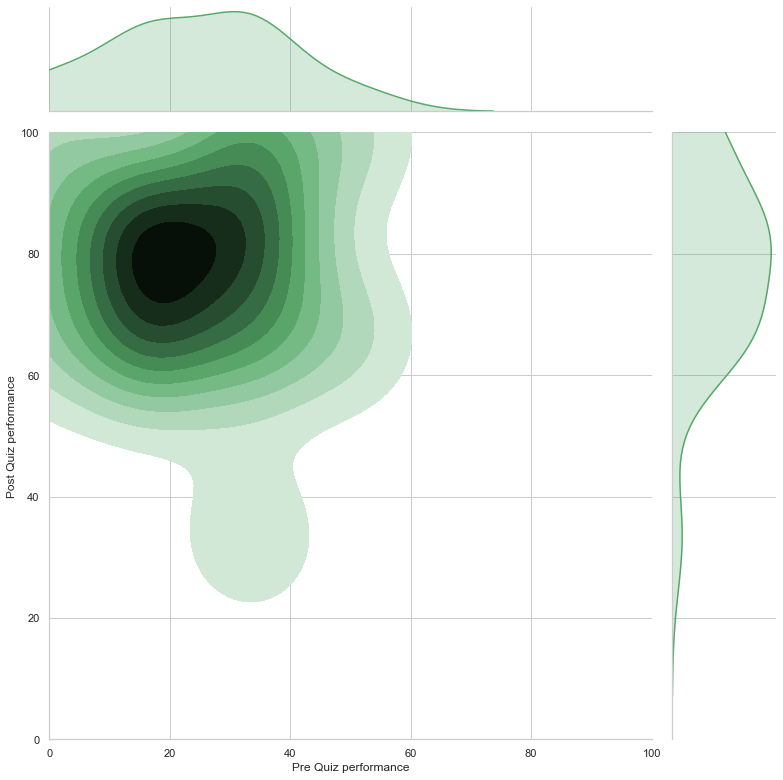

In [13]:
sns.set(style="white", color_codes=True)
sns.set(style="whitegrid")
g = sns.jointplot(x="pre_quiz_norm", y="post_quiz_norm", data=df_students, kind="kde", color="g", height=11,joint_kws=dict(shade_lowest=False))  # "reg", "kde"
g.ax_marg_x.set_xlim(0, 100)
g.ax_marg_y.set_ylim(0, 100)

g.ax_joint.set_xlabel('Pre Quiz performance')
g.ax_joint.set_ylabel('Post Quiz performance');

### What is the performance of each student on Pre-Quiz vs. Post-Quiz?

In [14]:
students = list(df_students["student"])
students_anon = list(df_students["student_anon"])
data = {"student": students*2,
        "student_anon": students_anon*2,
       "quiz": ["pre-quiz"]*len(students) + ["post-quiz"]*len(students),
       "score": [q1[s][0] for s in students] + [q2[s][0] for s in students],
       "score_norm": [q1[s][1]*100 for s in students] + [q2[s][1]*100 for s in students],
       "team_type": [ "SAME" if team_mapping[s].startswith("same") else "MIXED" for s in students]*2}
df = pd.DataFrame(data)
df.head()

,student,student_anon,quiz,score,score_norm,team_type
0,oriane_peter,student #1,pre-quiz,0,0.000000,SAME
1,thanuditha_wickramasinghe,student #2,pre-quiz,2,33.333333,MIXED
2,graziano_rossini,student #3,pre-quiz,2,33.333333,MIXED
3,alfonso_fernandez,student #4,pre-quiz,1,16.666667,SAME
4,marcel_moya,student #5,pre-quiz,1,16.666667,SAME


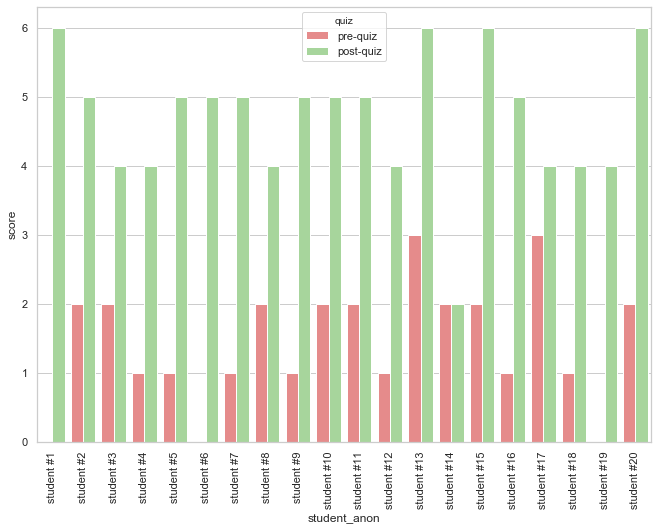

In [15]:
sns.set(style="white", color_codes=True)
sns.set(style="whitegrid")
g = sns.barplot(x="student_anon", y="score", hue="quiz", data=df, palette=["#F47C7C", "#A1DE93"]);
g.set_xticklabels(g.get_xticklabels(), rotation=90);

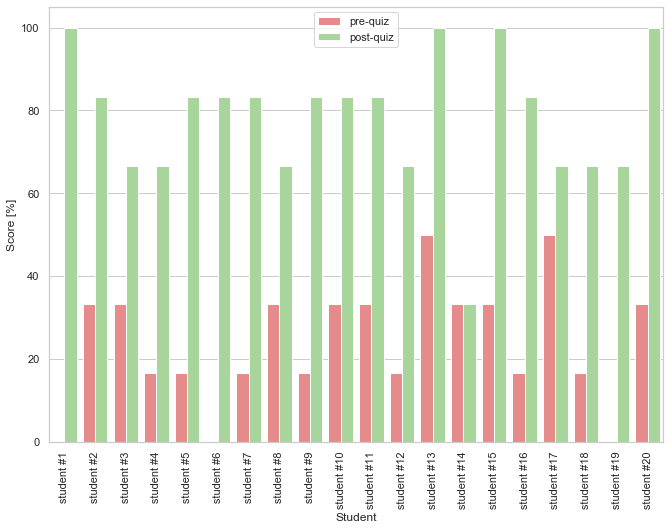

In [16]:
g = sns.barplot(x="student_anon", y="score_norm", hue="quiz", data=df, palette=["#F47C7C", "#A1DE93"]);
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.ylabel("Score [%]")
plt.xlabel("Student")
plt.legend();

### How much did students learn (if at all)? 

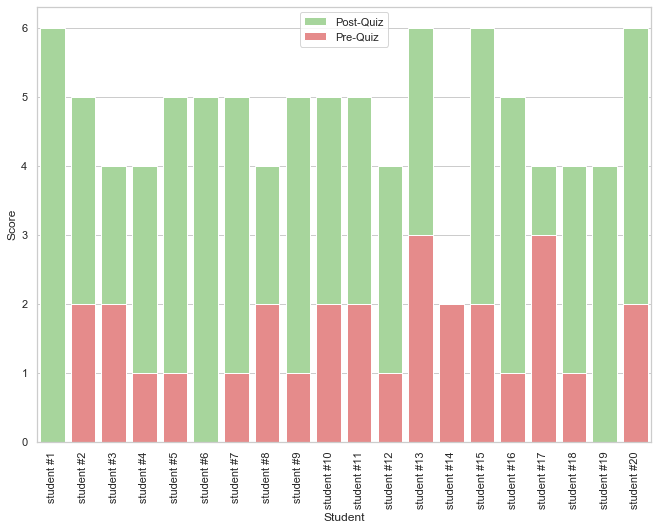

In [17]:
sns.barplot(x = df_students["student_anon"], y = df_students["post_quiz"], color="#72B6A1", label="Post-Quiz", palette=["#A1DE93"])
bottom_plot = sns.barplot(x = df_students["student_anon"], y = df_students["pre_quiz"], color="#E99675", label = "Pre-Quiz", palette=["#F47C7C"])

bottom_plot.set_xticklabels(bottom_plot.get_xticklabels(), rotation=90);
plt.ylabel("Score")
plt.xlabel("Student")
plt.legend();

### Are the students coming from MIXED groups perform better individually than the students coming from the SAME groups?

In [18]:
df.describe()

,score,score_norm
count,40.000000,40.000000
mean,3.075000,51.250000
std,1.886355,31.439242
min,0.000000,0.000000
25%,1.750000,29.166667
50%,3.000000,50.000000
75%,5.000000,83.333333
max,6.000000,100.000000


In [19]:
dfs = df[df.team_type=="SAME"]
dfm = df[df.team_type=="MIXED"]
stats.ttest_ind(a=dfm["score_norm"],b=dfs["score_norm"], equal_var=False)

Ttest_indResult(statistic=0.38302163024018754, pvalue=0.7042074174102408)

Text(0.5, 0, 'Team type')

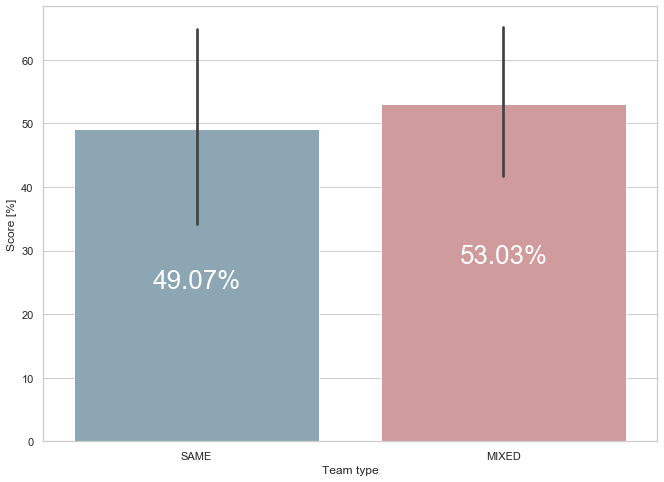

In [20]:
ax = sns.barplot(x = df["team_type"], y = df["score_norm"],  palette=["#85A8BA", "#D99294"])
#bottom_plot = sns.barplot(x = df["team_type"], y = df_teams["DGSM"], color="#E99675", label = "DGSM")

total_qns = 18
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height-25,
            f'{height:1.2f}%',
            ha="center",
            color="white",
           fontsize=26,
           fontweight=4) 

bottom_plot.set_xticklabels(bottom_plot.get_xticklabels(), rotation=90);
plt.ylabel("Score [%]")
plt.xlabel("Team type")

---

# Team Quizes

### Read data

In [21]:
q4 = np.load('scores/DGSM_Scores.npy', allow_pickle=True).item()
q5 = np.load('scores/SGDM_Scores.npy', allow_pickle=True).item()

In [22]:
teams = list(q4.keys())
data = {"team": teams, 
        "DGSM": [q4[x][0] for x in teams],  # 9 questions
        "DGSM_norm": [q4[x][1]*100 for x in teams],
        "SGDM": [q5[x][0] for x in teams],  # 9 questions
        "SGDM_norm": [q5[x][1]*100 for x in teams]}
df_teams = pd.DataFrame(data)
df_teams["total"] = df_teams.apply(lambda x: x["DGSM"]+x["SGDM"], axis=1)
df_teams["total_norm"] = df_teams.apply(lambda x: x["total"]/18*100, axis=1)

In [23]:
print(df_teams.shape)
df_teams

(9, 7)


,team,DGSM,DGSM_norm,SGDM,SGDM_norm,total,total_norm
0,mixed1,7,77.777778,5,55.555556,12,66.666667
1,mixed3,6,66.666667,8,88.888889,14,77.777778
2,mixed4,7,77.777778,7,77.777778,14,77.777778
3,mixed5,6,66.666667,8,88.888889,14,77.777778
4,same1,5,55.555556,8,88.888889,13,72.222222
5,same3,4,44.444444,8,88.888889,12,66.666667
6,same4,7,77.777778,7,77.777778,14,77.777778
7,same5,7,77.777778,7,77.777778,14,77.777778
8,mixed2,7,77.777778,8,88.888889,15,83.333333


### Team Stats

In [24]:
df_teams.describe()

,DGSM,DGSM_norm,SGDM,SGDM_norm,total,total_norm
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,6.222222,69.135802,7.333333,81.481481,13.555556,75.308642
std,1.092906,12.143405,1.000000,11.111111,1.013794,5.632188
min,4.000000,44.444444,5.000000,55.555556,12.000000,66.666667
25%,6.000000,66.666667,7.000000,77.777778,13.000000,72.222222
50%,7.000000,77.777778,8.000000,88.888889,14.000000,77.777778
75%,7.000000,77.777778,8.000000,88.888889,14.000000,77.777778
max,7.000000,77.777778,8.000000,88.888889,15.000000,83.333333


### On which type of questions did teams perform better: DGSM or SGDM?

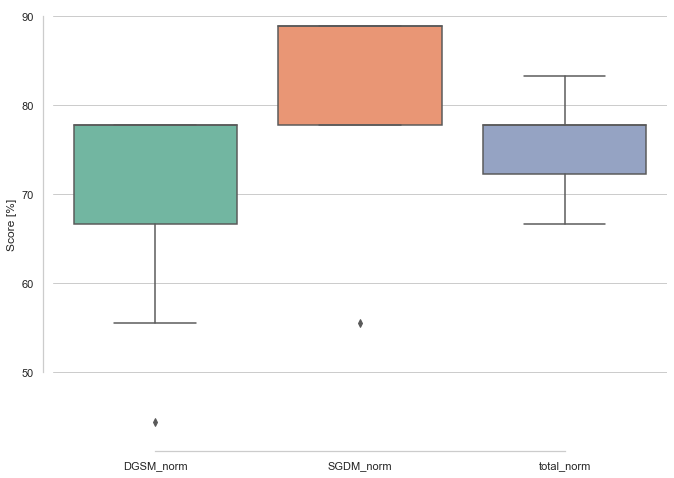

In [25]:
sns.boxplot(data=df_teams[["DGSM_norm", "SGDM_norm", "total_norm"]], orient="w", palette="Set2")
sns.despine(offset=10, trim=True)

plt.ylabel("Score [%]");

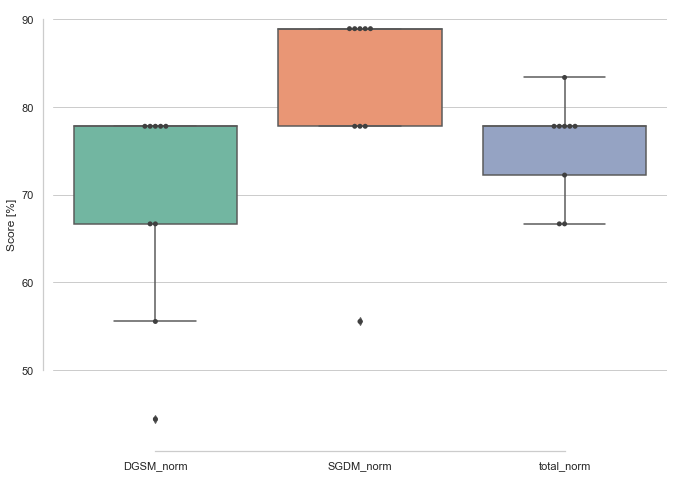

In [26]:
sns.boxplot(data=df_teams[["DGSM_norm", "SGDM_norm", "total_norm"]], orient="w", palette="Set2")
sns.despine(offset=10, trim=True)
sns.swarmplot(data=df_teams[["DGSM_norm", "SGDM_norm", "total_norm"]], color=".25");

plt.ylabel("Score [%]");

### What team performed best?

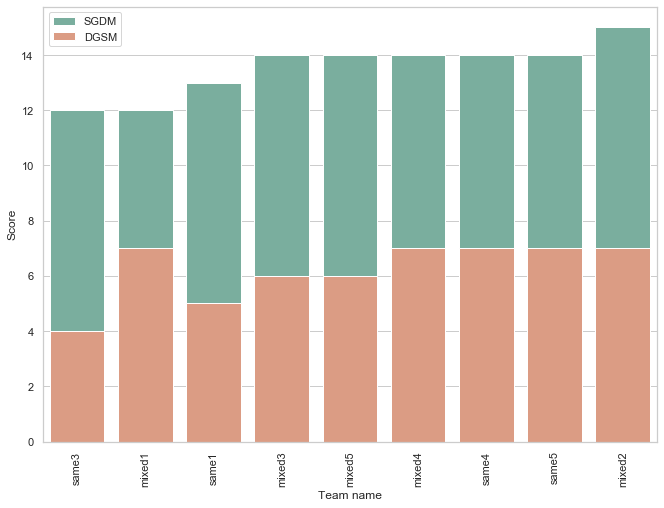

In [27]:
df_teams = df_teams.sort_values(["total", "DGSM"])

sns.barplot(x = df_teams["team"], y = df_teams["total"], color="#72B6A1", label="SGDM")
bottom_plot = sns.barplot(x = df_teams["team"], y = df_teams["DGSM"], color="#E99675", label = "DGSM")

bottom_plot.set_xticklabels(bottom_plot.get_xticklabels(), rotation=90);
plt.ylabel("Score")
plt.xlabel("Team name")
plt.legend();

### What is performance of SAME vs. MIXED teams w.r.t. quiz type (DGSM and SGDM)?

In [28]:
teams = list(df_teams["team"])
data = {"team": teams*2,
       "quiz_type": ["DGSM"]*len(teams) + ["SGDM"]*len(teams),
       "score": [q4[s][0] for s in teams] + [q5[s][0] for s in teams],
        "score_norm": [q4[s][1] for s in teams] + [q5[s][1] for s in teams],
       "team_type": ["SAME" if t.startswith("same") else "MIXED" for t in teams ]*2}
df = pd.DataFrame(data)
df["total"] = df.apply(lambda x: df[df.team==x.team].score.sum()/18*100, axis=1)
df

,team,quiz_type,score,score_norm,team_type,total
0,same3,DGSM,4,0.444444,SAME,66.666667
1,mixed1,DGSM,7,0.777778,MIXED,66.666667
2,same1,DGSM,5,0.555556,SAME,72.222222
3,mixed3,DGSM,6,0.666667,MIXED,77.777778
4,mixed5,DGSM,6,0.666667,MIXED,77.777778
5,mixed4,DGSM,7,0.777778,MIXED,77.777778
6,same4,DGSM,7,0.777778,SAME,77.777778
7,same5,DGSM,7,0.777778,SAME,77.777778
8,mixed2,DGSM,7,0.777778,MIXED,83.333333
9,same3,SGDM,8,0.888889,SAME,66.666667


##### Question count

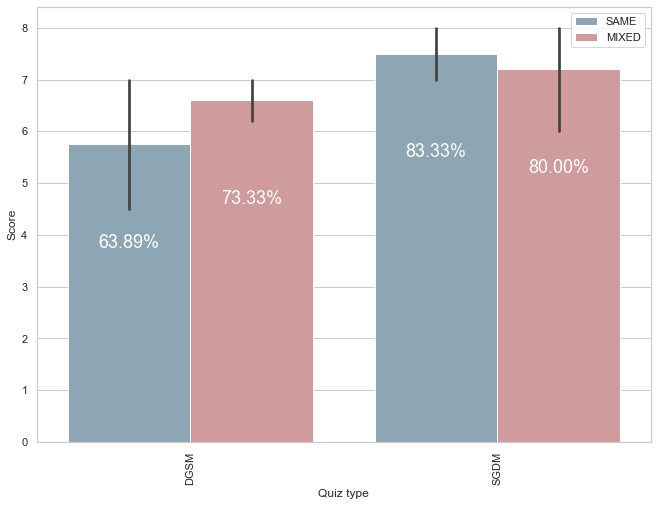

In [29]:
ax = sns.barplot(x="quiz_type", y="score", hue="team_type", data=df, palette=["#85A8BA", "#D99294"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

total_qns = 9
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height-2,
            f'{height/total_qns*100:1.2f}%',
            ha="center",
            color="white",
           fontsize=18) 

plt.ylabel("Score")
plt.xlabel("Quiz type")
plt.legend();

### Which team type performed better: SAME or MIXED?

In [30]:
dfs

,student,student_anon,quiz,score,score_norm,team_type
0,oriane_peter,student #1,pre-quiz,0,0.000000,SAME
3,alfonso_fernandez,student #4,pre-quiz,1,16.666667,SAME
4,marcel_moya,student #5,pre-quiz,1,16.666667,SAME
6,anel_muhamedagic,student #7,pre-quiz,1,16.666667,SAME
8,guido_sergi,student #9,pre-quiz,1,16.666667,SAME
10,giacomo_alliata,student #11,pre-quiz,2,33.333333,SAME
17,natalia_gullon,student #18,pre-quiz,1,16.666667,SAME
18,max_schnaubelt,student #19,pre-quiz,0,0.000000,SAME
19,antoine_clivaz,student #20,pre-quiz,2,33.333333,SAME
20,oriane_peter,student #1,post-quiz,6,100.000000,SAME


In [31]:
dfs = df[df.team_type=="SAME"]
dfm = df[df.team_type=="MIXED"]
stats.ttest_ind(a=dfm["score_norm"],b=dfs["score_norm"], equal_var=False)

Ttest_indResult(statistic=0.46707095976775853, pvalue=0.6486858343600241)

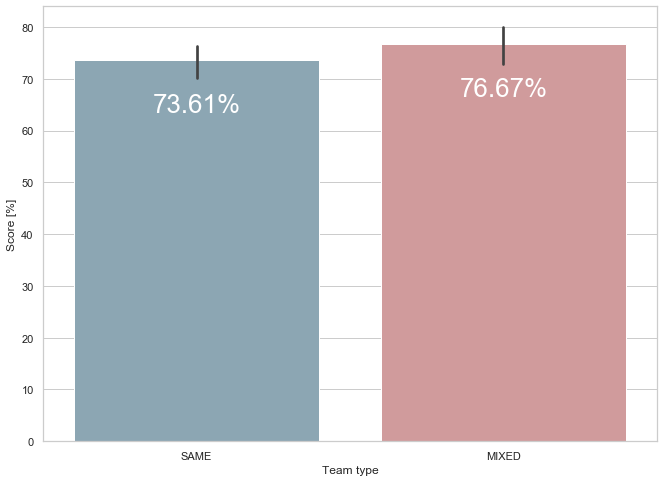

In [32]:
ax = sns.barplot(x = df["team_type"], y = df["total"],  palette=["#85A8BA", "#D99294"])
#bottom_plot = sns.barplot(x = df["team_type"], y = df_teams["DGSM"], color="#E99675", label = "DGSM")


total_qns = 18
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height-10,
            f'{height:1.2f}%',
            ha="center",
            color="white",
           fontsize=26,
           fontweight=4) 

bottom_plot.set_xticklabels(bottom_plot.get_xticklabels(), rotation=90);
plt.ylabel("Score [%]")
plt.xlabel("Team type");

### Compare SGDM vs DGSM from pre-quiz and post-quiz?

In [33]:
df_student_scores = pd.read_csv("scores/quiz_SGDM_DGSM.csv")
df_student_scores["team_type"] = df_student_scores.apply(lambda x: "SAME" if team_mapping[x["student"]].startswith("same") else "MIXED", axis=1)
df_student_scores["team_quiz_type"] = df_student_scores.apply(lambda x: x["team_type"] + " & " + x["quiz_type"], axis=1)
df_student_scores

,student,score,score_norm,quiz_type,when,team_type,team_quiz_type
0,louis,0,0.000000,DGSM,PRE-QUIZ,MIXED,MIXED & DGSM
1,louis,1,33.333333,SGDM,PRE-QUIZ,MIXED,MIXED & SGDM
2,louis,2,66.666667,DGSM,POST-QUIZ,MIXED,MIXED & DGSM
3,louis,3,100.000000,SGDM,POST-QUIZ,MIXED,MIXED & SGDM
4,kevin,1,33.333333,DGSM,PRE-QUIZ,MIXED,MIXED & DGSM
...,...,...,...,...,...,...,...
75,alfonso_fernandez,3,100.000000,SGDM,POST-QUIZ,SAME,SAME & SGDM
76,natalia_gullon,0,0.000000,DGSM,PRE-QUIZ,SAME,SAME & DGSM
77,natalia_gullon,1,33.333333,SGDM,PRE-QUIZ,SAME,SAME & SGDM
78,natalia_gullon,1,33.333333,DGSM,POST-QUIZ,SAME,SAME & DGSM


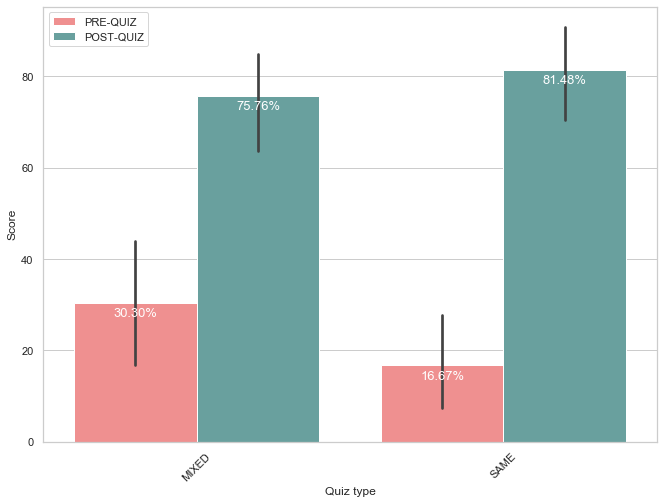

In [34]:
sns.set_context({"figure.figsize": (11,8)})
ax = sns.barplot(x="team_type", y="score_norm", hue="when", data=df_student_scores, palette=["#FF8080", "#60A9A6"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

total_qns = 9
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height-3,
            f'{height:1.2f}%',
            ha="center",
            color="white",
           fontsize=13) 

plt.ylabel("Score")
plt.xlabel("Quiz type")
plt.legend();

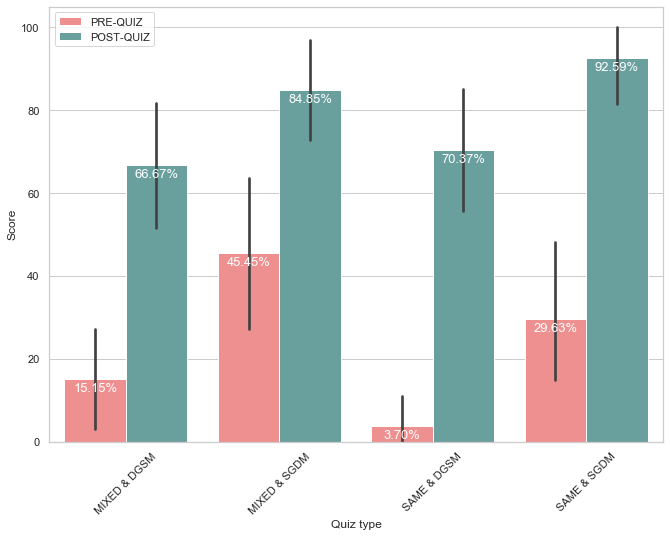

In [35]:
sns.set_context({"figure.figsize": (11,8)})
ax = sns.barplot(x="team_quiz_type", y="score_norm", hue="when", data=df_student_scores, palette=["#FF8080", "#60A9A6"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

total_qns = 9
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height-3,
            f'{height:1.2f}%',
            ha="center",
            color="white",
           fontsize=13) 

plt.ylabel("Score")
plt.xlabel("Quiz type")
plt.legend();

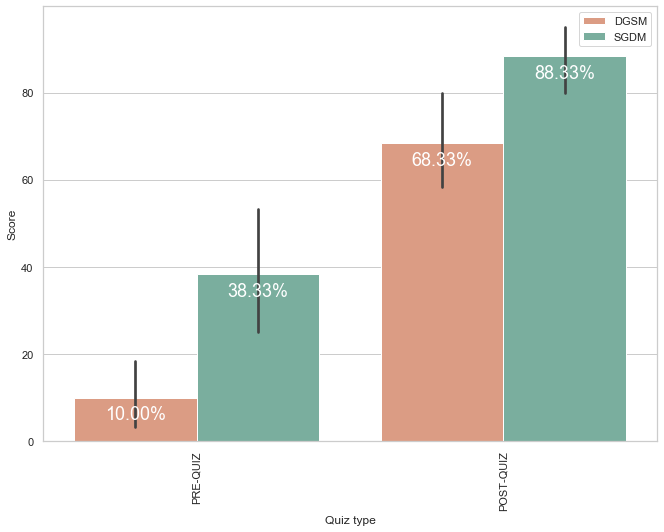

In [36]:
sns.set_context({"figure.figsize": (11,8)})
ax = sns.barplot(x="when", y="score_norm", hue="quiz_type", data=df_student_scores, palette=["#E99675", "#72B6A1"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

total_qns = 9
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height-5,
            f'{height:1.2f}%',
            ha="center",
            color="white",
           fontsize=18) 

plt.ylabel("Score")
plt.xlabel("Quiz type")
plt.legend();

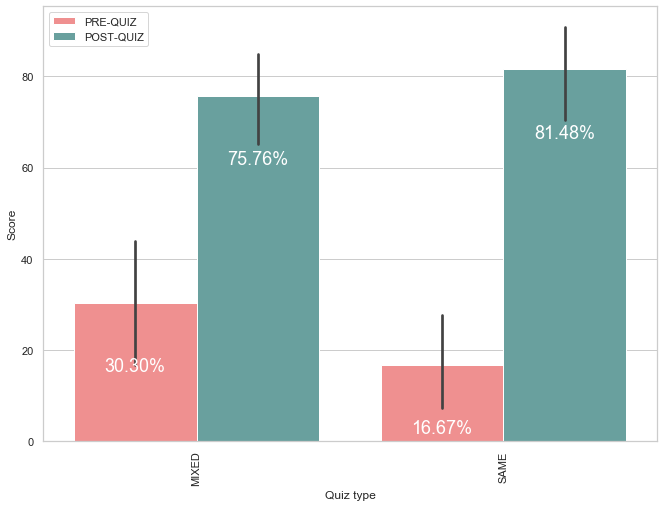

In [37]:
sns.set_context({"figure.figsize": (11,8)})
ax = sns.barplot(x="team_type", y="score_norm", hue="when", data=df_student_scores, palette=["#FF8080", "#60A9A6"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

total_qns = 9
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height-15,
            f'{height:1.2f}%',
            ha="center",
            color="white",
           fontsize=18) 

plt.ylabel("Score")
plt.xlabel("Quiz type")
plt.legend();

In [38]:
df_student_scores

,student,score,score_norm,quiz_type,when,team_type,team_quiz_type
0,louis,0,0.000000,DGSM,PRE-QUIZ,MIXED,MIXED & DGSM
1,louis,1,33.333333,SGDM,PRE-QUIZ,MIXED,MIXED & SGDM
2,louis,2,66.666667,DGSM,POST-QUIZ,MIXED,MIXED & DGSM
3,louis,3,100.000000,SGDM,POST-QUIZ,MIXED,MIXED & SGDM
4,kevin,1,33.333333,DGSM,PRE-QUIZ,MIXED,MIXED & DGSM
...,...,...,...,...,...,...,...
75,alfonso_fernandez,3,100.000000,SGDM,POST-QUIZ,SAME,SAME & SGDM
76,natalia_gullon,0,0.000000,DGSM,PRE-QUIZ,SAME,SAME & DGSM
77,natalia_gullon,1,33.333333,SGDM,PRE-QUIZ,SAME,SAME & SGDM
78,natalia_gullon,1,33.333333,DGSM,POST-QUIZ,SAME,SAME & DGSM


In [39]:
prequiz = df_student_scores[df_student_scores['when']=='PRE-QUIZ'].reset_index(inplace=False, drop=True)
postquiz = df_student_scores[df_student_scores['when']=='POST-QUIZ'].reset_index(inplace=False, drop=True)

In [40]:
postquiz = postquiz.drop(['score_norm','when', 'team_quiz_type','team_quiz_type'], axis=1)
prequiz = prequiz.drop(['score_norm','when', 'team_quiz_type','team_quiz_type'], axis=1)

In [41]:
learning_gain = (postquiz.score-prequiz.score)/6

In [42]:
prequiz['learning_gain'] = learning_gain

In [43]:
prequiz = prequiz.drop(['score'], axis=1)

In [46]:
prequiz.to_csv('df_anova.csv')

In [1]:
df_anova = read.csv('df_anova.csv')

In [2]:
df_anova

X,student,quiz_type,team_type,learning_gain
0,louis,DGSM,MIXED,0.3333333
1,louis,SGDM,MIXED,0.3333333
2,kevin,DGSM,MIXED,0.3333333
3,kevin,SGDM,MIXED,0.3333333
4,anna_andersson,DGSM,MIXED,0.1666667
5,anna_andersson,SGDM,MIXED,0.0000000
6,thanuditha_wickramasinghe,DGSM,MIXED,0.3333333
7,thanuditha_wickramasinghe,SGDM,MIXED,0.1666667
8,graziano_rossini,DGSM,MIXED,0.1666667
9,graziano_rossini,SGDM,MIXED,0.1666667


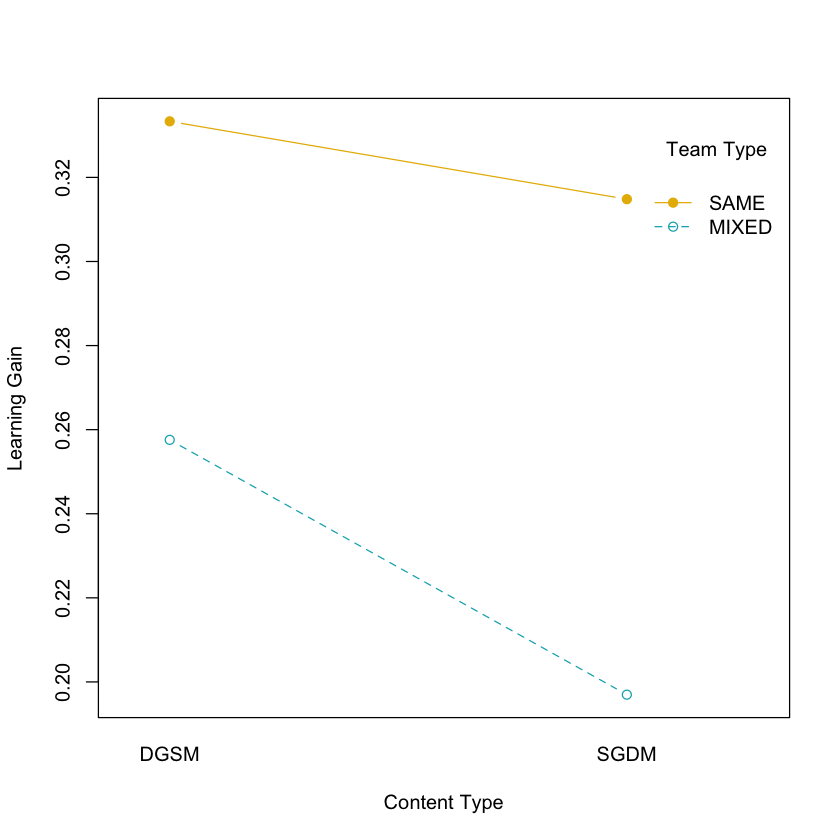

In [37]:
# Two-way interaction plot
interaction.plot(x.factor = df_anova$quiz_type, trace.factor = df_anova$team_type, 
                 response = df_anova$learning_gain, fun = mean,
                 type = "b", legend = TRUE, 
                 xlab = "Content Type", ylab="Learning Gain",
                 pch=c(1,19), col = c("#00AFBB", "#E7B800"),
                 trace.label = 'Team Type')

In [38]:
res <- aov(learning_gain ~ quiz_type + team_type + quiz_type:team_type, data = df_anova)
summary(res)

                    Df Sum Sq Mean Sq F value Pr(>F)  
quiz_type            1 0.0174 0.01736   0.720 0.4018  
team_type            1 0.0928 0.09277   3.847 0.0576 .
quiz_type:team_type  1 0.0044 0.00438   0.182 0.6724  
Residuals           36 0.8681 0.02411                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [98]:
pd.pivot_table(df_student_scores, values='score_norm', index=['student'],columns=['when','quiz_type'])

when                        POST-QUIZ               PRE-QUIZ            
quiz_type                        DGSM        SGDM       DGSM        SGDM
student                                                                 
alexandre_thimonier         66.666667   66.666667  66.666667    0.000000
alfonso_fernandez           33.333333  100.000000   0.000000   33.333333
ambroise_renaud             33.333333  100.000000   0.000000   33.333333
anel_muhamedagic            66.666667  100.000000  33.333333    0.000000
anna_andersson              33.333333  100.000000   0.000000  100.000000
antoine_clivaz             100.000000  100.000000   0.000000   66.666667
arnaud_garin               100.000000  100.000000   0.000000  100.000000
giacomo_alliata             66.666667  100.000000   0.000000   66.666667
graziano_rossini            66.666667   66.666667  33.333333   33.333333
guido_sergi                100.000000   66.666667   0.000000   33.333333
kevin                      100.000000  100.000000  33.333333   33.333333
kiarash_farivar             33.333333   33.333333   0.000000   66.666667
kim_haeeun                  66.666667  100.000000   0.000000   66.666667
louis                       66.666667  100.000000   0.000000   33.333333
lukas_deloose               66.666667  100.000000   0.000000    0.000000
marcel_moya                 66.666667  100.000000   0.000000   33.333333
max_schnaubelt              66.666667   66.666667   0.000000    0.000000
natalia_gullon              33.333333  100.000000   0.000000   33.333333
oriane_peter               100.000000  100.000000   0.000000    0.000000
thanuditha_wickramasinghe  100.000000   66.666667  33.333333   33.333333